In [19]:
from astropy.modeling.models import Gaussian2D
from astropy.nddata import CCDData, Cutout2D, block_reduce
import numpy as np
import matplotlib.pyplot as plt

In [20]:
y, x = np.mgrid[0:500, 0:600]

In [21]:
data = (
    Gaussian2D(1, 150, 100, 20, 10, theta=0.5)(x, y) +
    Gaussian2D(0.5, 400, 300, 8, 12, theta=1.2)(x, y) +
    Gaussian2D(0.75, 250, 400, 5, 7, theta=0.23)(x, y) +
    Gaussian2D(0.9, 525, 150, 3, 3)(x, y) +
    Gaussian2D(0.6, 200, 225, 3, 3)(x, y)
)

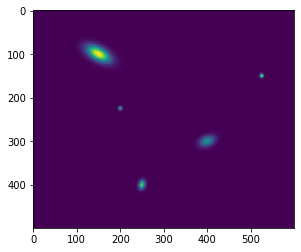

In [22]:
cosmic_ray_value = 0.997
data[100, 300:310] = cosmic_ray_value
plt.imshow(data)

In [108]:
mask = (data == cosmic_ray_value)

In [109]:
ccd = CCDData(
    data, 
    mask=mask,
    meta={'object': 'fake galaxy', 'filter': 'R'},
    unit='adu'
)

In [111]:
ccd.write('test_file.fits')
ccd2 = CCDData.read('test_file.fits')

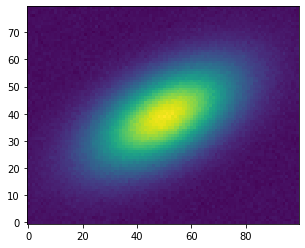

In [112]:
position = (149.7, 100.1)
size = (80, 100)
cutout = Cutout2D(ccd, position, size)
plt.imshow(cutout.data, origin='lower')
cutout.plot_on_original(color='white')

F:\Programy\Anaconda\lib\site-packages\astropy\nddata\decorators.py:244: AstropyUserWarning: The following attributes were set on the data object, but will be ignored by the function: mask, meta, unit
  AstropyUserWarning)


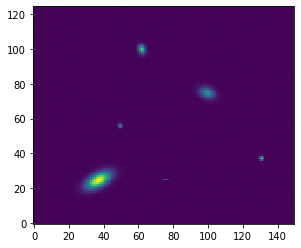

In [113]:
smaller = block_reduce(ccd, 4)
plt.imshow(smaller, origin='lower')